# **환경셋팅**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.preprocessing import StandardScaler

* 산업별 평균 처리
* 평균 처리 여부 열 추가
* 중소기업 1 만 추출
* 스케일링 minmax
* 가중치
* 등급화

# **final_dataset**

In [ ]:
# 사업자번호 + 분류코드
df_info = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/YG/processed_dataset/사업자등록번호-산업분류코드(90427개).csv')

# 기업 상세 정보
df_business = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/dataset/기업성장_16종/기업정보상세.csv')

# 연길
df_self_growth = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/YG/processed_dataset/자기성장성.csv')
df_time = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/YG/processed_dataset/근무시간.csv')

# 다영
df_salary = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/JDY/result/df_salary.csv')
df_infra = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/JDY/result/df_infra.csv')
df_employ_safe = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/JDY/result/df_employ_safe.csv')


# 영운
df_orgculture = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/YW/df_orgCulture_final.csv')
df_welfare_all = pd.read_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/YW/df_welfare_all_final.csv')


In [ ]:
df_business = df_business[['사업자등록번호', '산업분류코드', '기업명', '기업규모', '우편번호', '주소', '전화번호', '이메일주소']]
df_business = df_business[df_business['기업규모'] == '중소기업']

df_business.head()

,사업자등록번호,산업분류코드,기업명,기업규모,우편번호,주소,전화번호,이메일주소
0,1050508965,96910.0,크린토**,중소기업,3998.0,서울 마포구 동교로17길,NaN,NaN
1,1010204456,46510.0,씨앤피비즈***,중소기업,3966.0,서울 마포구 월드컵북로 137,02-334-0349,djham29@hanmail.net
2,1048107174,50130.0,(주)씨트랜***,중소기업,4031.0,서울 마포구 월드컵북로1길 26-16,02-322-4890,NaN
3,1018102731,73203.0,(주)파***,중소기업,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr
4,1018606595,68122.0,(주)에이치제이디벨***,중소기업,4174.0,서울특별시 마포구 마포대로 34,02 718 7844,NaN


In [ ]:
df_business['기업규모'].value_counts()

중소기업    9354
Name: 기업규모, dtype: int64

In [ ]:
df_self_growth.head()

df_self_growth = df_self_growth[['사업자등록번호', '직군명', '평가자수', '인적자원개발점수', '인적자원자기개발점수', '승진기회점수', 'recommand_score']]
df_self_growth.columns = ['사업자등록번호', '직군명', '평가자수', '인적자원개발점수', '인적자원자기개발점수', '승진기회점수', '기업추천점수']


df_time = df_time[['사업자등록번호', '직군명', '대분류_산업분류코드', '업무생명균형점수']]
df_time.head()
df_salary.head()
df_infra.head()
df_employ_safe.head()


df_orgculture = df_orgculture[['사업자등록번호', '직군명', '기업문화점수', '경영진점수평균', '산업분류코드', '대분류_산업분류코드']]
df_orgculture.head()

df_welfare_all = df_welfare_all[['사업자등록번호', '인적자원복지점수', '연차평균(종합)', '기업규모변환', '산업분류코드', '대분류_산업분류코드']]
df_welfare_all.head()

,사업자등록번호,인적자원복지점수,연차평균(종합),기업규모변환,산업분류코드,대분류_산업분류코드
0,1000861574,15.0,NaN,NaN,0.0,Z
1,1010116480,15.0,NaN,NaN,47312.0,G
2,1010117247,15.0,NaN,NaN,33910.0,C
3,1010117344,15.0,NaN,NaN,47312.0,G
4,1010122565,15.0,NaN,NaN,59111.0,J


In [ ]:
df_merge = df_info[['사업자등록번호', '산업분류코드', '중분류_산업분류코드', '대분류_산업분류코드']]

df_merge = pd.merge(df_merge, df_self_growth, how = 'left', left_on = ['사업자등록번호'], right_on = ['사업자등록번호'])
df_merge = pd.merge(df_merge, df_time, how = 'left', left_on = ['사업자등록번호', '대분류_산업분류코드', '직군명'], right_on = ['사업자등록번호', '대분류_산업분류코드', '직군명'])
df_merge = pd.merge(df_merge, df_salary, how = 'left', left_on = ['사업자등록번호', '직군명', '평가자수'], right_on = ['사업자등록번호', '직군명', '평가자수'])
df_merge = pd.merge(df_merge, df_infra, how = 'left', left_on = ['사업자등록번호', '산업분류코드'], right_on = ['사업자등록번호', '산업분류코드'])
df_merge = pd.merge(df_merge, df_employ_safe, how = 'left', left_on = ['사업자등록번호', '산업분류코드'], right_on = ['사업자등록번호', '산업분류코드'])
df_merge = pd.merge(df_merge, df_orgculture, how = 'left', left_on = ['사업자등록번호', '산업분류코드', '직군명', '대분류_산업분류코드'], right_on = ['사업자등록번호', '산업분류코드', '직군명', '대분류_산업분류코드'])
df_merge = pd.merge(df_merge, df_welfare_all, how = 'left', left_on = ['사업자등록번호', '산업분류코드', '대분류_산업분류코드'], right_on = ['사업자등록번호', '산업분류코드', '대분류_산업분류코드'])


df_merge['직군명'] = df_merge['직군명'].fillna('존재하지않음')
df_merge['평가자수'] = df_merge['평가자수'].fillna(0)


category = ['인적자원개발점수', '인적자원자기개발점수', '승진기회점수', 
            '기업추천점수', '업무생명균형점수', '복지및급여점수', '근무환경평균만족도', 
            '평균근속기간', '고용전망점수', '기업문화점수', '경영진점수평균', '인적자원복지점수', '연차평균(종합)']

for i in category:
  df_merge.loc[df_merge[i].isnull() == True, i + '_데이터'] = '예측데이터반영'
  df_merge.loc[df_merge[i].isnull() != True, i + '_데이터'] = '실제데이터반영'


for i in category:
  df_merge_tmp = df_merge[['산업분류코드', i]]
  df_merge_tmp = df_merge_tmp.groupby('산업분류코드').mean().reset_index()
  df_merge_tmp.columns = ['산업분류코드', '산업별_' + i]

  df_merge = pd.merge(df_merge, df_merge_tmp, how = 'left', left_on = '산업분류코드', right_on = '산업분류코드')
  df_merge[i] = np.where(pd.notnull(df_merge[i]) == True, df_merge[i], df_merge['산업별_' + i])

  df_merge = df_merge.drop(['산업별_' + i], axis = 1)
  df_merge[i] = df_merge[i].fillna(df_merge[i].mean())


df_merge = df_merge[df_merge['기업규모변환']==1]

df_merge = pd.merge(df_business, df_merge, how = 'inner')
df_merge = df_merge.drop(['중분류_산업분류코드', '대분류_산업분류코드', '기업규모변환', '기업규모'], axis = 1)

df_merge['우편번호'] = df_merge['우편번호'].fillna('존재하지않음')
df_merge['주소'] = df_merge['주소'].fillna('존재하지않음')
df_merge['전화번호'] = df_merge['전화번호'].fillna('존재하지않음')
df_merge['이메일주소'] = df_merge['이메일주소'].fillna('존재하지않음')


df_merge

,사업자등록번호,산업분류코드,기업명,우편번호,주소,전화번호,이메일주소,직군명,평가자수,인적자원개발점수,...,기업추천점수_데이터,업무생명균형점수_데이터,복지및급여점수_데이터,근무환경평균만족도_데이터,평균근속기간_데이터,고용전망점수_데이터,기업문화점수_데이터,경영진점수평균_데이터,인적자원복지점수_데이터,연차평균(종합)_데이터
0,1050508965,96910.0,크린토**,3998.0,서울 마포구 동교로17길,존재하지않음,존재하지않음,존재하지않음,0.0,6.000000,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
1,1010204456,46510.0,씨앤피비즈***,3966.0,서울 마포구 월드컵북로 137,02-334-0349,djham29@hanmail.net,존재하지않음,0.0,6.058296,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
2,1048107174,50130.0,(주)씨트랜***,4031.0,서울 마포구 월드컵북로1길 26-16,02-322-4890,존재하지않음,존재하지않음,0.0,6.000000,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
3,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,경영/기획/컨설팅,3.0,6.000000,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
4,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,교육,1.0,6.000000,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,2148708573,58222.0,아이티***,존재하지않음,"서울특별시 중구 삼일대로2길 70 (주자동,아이티메이트빌딩)",02-326-2106,존재하지않음,교육,1.0,6.024742,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12445,4208704866,41119.0,부강산***,존재하지않음,서울특별시 노원구 동일로183길 10 301호 (공릉동),02-2606-2236,존재하지않음,존재하지않음,0.0,6.000000,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12446,4618107952,41222.0,아이렉***,존재하지않음,"서울 금천구 디지털로 173 1104호-14호실 (가산동,엘리시아)",02-3288-3345,존재하지않음,존재하지않음,0.0,6.000000,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12447,2208107776,63100.0,파이진***,존재하지않음,"서울 강남구 테헤란로 328 10층 (역삼동,동우빌딩)",02-501-1078,존재하지않음,존재하지않음,0.0,6.000000,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영


In [ ]:
df_merge.isnull().sum()

사업자등록번호           0
산업분류코드            0
기업명               0
우편번호              0
주소                0
전화번호              0
이메일주소             0
직군명               0
평가자수              0
인적자원개발점수          0
인적자원자기개발점수        0
승진기회점수            0
기업추천점수            0
업무생명균형점수          0
복지및급여점수           0
근무환경평균만족도         0
평균근속기간            0
고용전망점수            0
기업문화점수            0
경영진점수평균           0
인적자원복지점수          0
연차평균(종합)          0
인적자원개발점수_데이터      0
인적자원자기개발점수_데이터    0
승진기회점수_데이터        0
기업추천점수_데이터        0
업무생명균형점수_데이터      0
복지및급여점수_데이터       0
근무환경평균만족도_데이터     0
평균근속기간_데이터        0
고용전망점수_데이터        0
기업문화점수_데이터        0
경영진점수평균_데이터       0
인적자원복지점수_데이터      0
연차평균(종합)_데이터      0
dtype: int64

In [ ]:
len(pd.merge(
    df_merge, df_business, how = 'outer', indicator = True   
    ).query(
        '_merge == "right_only"'
    ).drop(columns = ['_merge']
    ))

47

In [ ]:
len(pd.merge(
    df_merge, df_business, how = 'outer', indicator = True   
    ).query(
        '_merge == "left_only"'
    ).drop(columns = ['_merge']
    ))

21

In [ ]:
df_final = df_merge.iloc[:, 0:9]

df_final['스펙과 커리어 지수'] = (df_merge['인적자원개발점수'] + df_merge['인적자원자기개발점수'] + df_merge['승진기회점수']) / 3
df_final['기업 추천 지수'] = df_merge['기업추천점수']
df_final['업무 시간 지수'] = df_merge['업무생명균형점수']
df_final['급여 수준 지수'] = df_merge['복지및급여점수']
df_final['근무 환경 지수'] = df_merge['근무환경평균만족도']
df_final['고용 형태 지수'] = df_merge['고용전망점수']
df_final['근속 기간 지수'] = df_merge['평균근속기간']
df_final['기업 문화 지수'] = df_merge['기업문화점수']
df_final['관리 체계 지수'] = df_merge['경영진점수평균']
df_final['복리 후생 지수'] = (df_merge['인적자원복지점수'] + df_merge['연차평균(종합)'])/2


category = ['스펙과 커리어 지수', '기업 추천 지수', '업무 시간 지수', '급여 수준 지수',
            '근무 환경 지수', '고용 형태 지수', '근속 기간 지수', '기업 문화 지수',
            '관리 체계 지수', '복리 후생 지수']

weight = [29.1 , 5.8, 18.5, 17.2, 7.5, 3.5, 0.9, 8.1, 1.5, 7.9]
tmp = 0

for i in category:
  df_final[i] = (df_final[i] - df_final[i].min()) / (df_final[i].max() - df_final[i].min())
  df_final[i] = df_final[i] * 100
  df_final[i] = df_final[i] * weight[tmp] / 100
  tmp += 1


df_final['최종 지수 총합'] = df_final.iloc[:, 9:20].sum(axis = 1)
df_final = pd.concat([df_final, df_merge.iloc[:, 22:]], axis = 1)


df_final

,사업자등록번호,산업분류코드,기업명,우편번호,주소,전화번호,이메일주소,직군명,평가자수,스펙과 커리어 지수,...,기업추천점수_데이터,업무생명균형점수_데이터,복지및급여점수_데이터,근무환경평균만족도_데이터,평균근속기간_데이터,고용전망점수_데이터,기업문화점수_데이터,경영진점수평균_데이터,인적자원복지점수_데이터,연차평균(종합)_데이터
0,1050508965,96910.0,크린토**,3998.0,서울 마포구 동교로17길,존재하지않음,존재하지않음,존재하지않음,0.0,10.662832,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
1,1010204456,46510.0,씨앤피비즈***,3966.0,서울 마포구 월드컵북로 137,02-334-0349,djham29@hanmail.net,존재하지않음,0.0,12.375278,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
2,1048107174,50130.0,(주)씨트랜***,4031.0,서울 마포구 월드컵북로1길 26-16,02-322-4890,존재하지않음,존재하지않음,0.0,10.197760,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
3,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,경영/기획/컨설팅,3.0,18.805776,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
4,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,교육,1.0,21.153417,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,2148708573,58222.0,아이티***,존재하지않음,"서울특별시 중구 삼일대로2길 70 (주자동,아이티메이트빌딩)",02-326-2106,존재하지않음,교육,1.0,21.198581,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12445,4208704866,41119.0,부강산***,존재하지않음,서울특별시 노원구 동일로183길 10 301호 (공릉동),02-2606-2236,존재하지않음,존재하지않음,0.0,14.110495,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12446,4618107952,41222.0,아이렉***,존재하지않음,"서울 금천구 디지털로 173 1104호-14호실 (가산동,엘리시아)",02-3288-3345,존재하지않음,존재하지않음,0.0,10.662832,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영
12447,2208107776,63100.0,파이진***,존재하지않음,"서울 강남구 테헤란로 328 10층 (역삼동,동우빌딩)",02-501-1078,존재하지않음,존재하지않음,0.0,10.882489,...,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영


In [ ]:
df_final.isnull().sum()

사업자등록번호           0
산업분류코드            0
기업명               0
우편번호              0
주소                0
전화번호              0
이메일주소             0
직군명               0
평가자수              0
스펙과 커리어 지수        0
기업 추천 지수          0
업무 시간 지수          0
급여 수준 지수          0
근무 환경 지수          0
고용 형태 지수          0
근속 기간 지수          0
기업 문화 지수          0
관리 체계 지수          0
복리 후생 지수          0
최종 지수 총합          0
인적자원개발점수_데이터      0
인적자원자기개발점수_데이터    0
승진기회점수_데이터        0
기업추천점수_데이터        0
업무생명균형점수_데이터      0
복지및급여점수_데이터       0
근무환경평균만족도_데이터     0
평균근속기간_데이터        0
고용전망점수_데이터        0
기업문화점수_데이터        0
경영진점수평균_데이터       0
인적자원복지점수_데이터      0
연차평균(종합)_데이터      0
dtype: int64

In [ ]:
df_final.to_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/JDY/result/df_final.csv', index = None)

# **clustering**

In [ ]:
df_cluster = df_final.loc[:, '스펙과 커리어 지수' : '최종 지수 총합']
df_cluster

,스펙과 커리어 지수,기업 추천 지수,업무 시간 지수,급여 수준 지수,근무 환경 지수,고용 형태 지수,근속 기간 지수,기업 문화 지수,관리 체계 지수,복리 후생 지수,최종 지수 총합
0,10.662832,1.693655,7.400636,6.498733,7.5,1.536585,0.263793,3.182464,0.002035,1.861089,40.601820
1,12.375278,2.225750,9.916220,7.242864,7.5,1.493902,0.178448,3.467933,0.317215,1.259551,45.977161
2,10.197760,0.638000,3.597222,8.122222,7.5,1.942073,0.380172,2.700000,0.162022,2.020244,37.259716
3,18.805776,1.914000,7.708333,7.166667,7.5,3.500000,0.279310,6.075000,0.185822,2.005587,55.140495
4,21.153417,0.000000,4.625000,4.300000,7.5,3.500000,0.279310,4.457143,0.185822,2.005587,48.006279
...,...,...,...,...,...,...,...,...,...,...,...
12444,21.198581,5.800000,13.875000,8.600000,7.5,1.600610,0.395690,3.819761,0.302198,5.554473,68.646313
12445,14.110495,0.000000,6.166667,4.300000,7.5,1.878049,0.178448,2.700000,0.032676,0.898457,37.764791
12446,10.662832,1.693655,7.400636,6.498733,7.5,1.878049,0.178448,3.182464,0.045777,0.898457,39.939049
12447,10.882489,0.000000,7.901042,4.120833,7.5,1.600610,0.256034,0.000000,0.017879,4.148069,36.426956


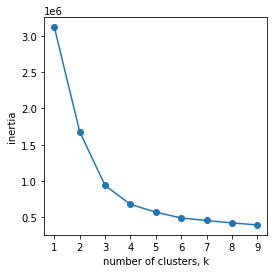

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_cluster)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
clust_model = KMeans(n_clusters = 5 
                     , n_init=100 
                     , max_iter=500 
                     , random_state = 42
                     , algorithm='auto'
                    )

clust_model.fit(df_cluster)  

centers = clust_model.cluster_centers_ 
pred = clust_model.predict(df_cluster) 

pd.DataFrame(centers)

,0,1,2,3,4,5,6,7,8,9,10
0,7.339463,0.854997,5.775561,4.916066,5.361048,2.215133,0.278975,2.642301,0.194708,2.115158,31.693410
1,14.229248,2.462035,10.037846,8.006692,7.191814,1.773747,0.270488,3.857163,0.307966,2.453816,50.590815
2,10.759984,1.561001,7.538560,6.346121,7.236346,1.840705,0.224109,3.202981,0.175977,1.731302,40.617085
3,22.649386,5.109247,15.325144,12.603707,7.010526,1.820836,0.280878,5.031645,0.277293,2.729657,72.838319
4,1.756513,0.321465,1.610894,2.177237,5.420277,2.195694,0.273609,1.832185,0.205800,2.296303,18.089977


In [ ]:
df_cluster['clust'] = pred
df_cluster.loc[df_cluster['clust'] == 3, '등급'] = 'A'
df_cluster.loc[df_cluster['clust'] == 1, '등급'] = 'B'
df_cluster.loc[df_cluster['clust'] == 2, '등급'] = 'C'
df_cluster.loc[df_cluster['clust'] == 0, '등급'] = 'D'
df_cluster.loc[df_cluster['clust'] == 4, '등급'] = 'E'

# df_cluster = df_cluster.drop(['clust'], axis = 1)

df_cluster

,스펙과 커리어 지수,기업 추천 지수,업무 시간 지수,급여 수준 지수,근무 환경 지수,고용 형태 지수,근속 기간 지수,기업 문화 지수,관리 체계 지수,복리 후생 지수,최종 지수 총합,등급,clust
0,10.662832,1.693655,7.400636,6.498733,7.5,1.536585,0.263793,3.182464,0.002035,1.861089,40.601820,C,2
1,12.375278,2.225750,9.916220,7.242864,7.5,1.493902,0.178448,3.467933,0.317215,1.259551,45.977161,B,1
2,10.197760,0.638000,3.597222,8.122222,7.5,1.942073,0.380172,2.700000,0.162022,2.020244,37.259716,C,2
3,18.805776,1.914000,7.708333,7.166667,7.5,3.500000,0.279310,6.075000,0.185822,2.005587,55.140495,B,1
4,21.153417,0.000000,4.625000,4.300000,7.5,3.500000,0.279310,4.457143,0.185822,2.005587,48.006279,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,21.198581,5.800000,13.875000,8.600000,7.5,1.600610,0.395690,3.819761,0.302198,5.554473,68.646313,A,3
12445,14.110495,0.000000,6.166667,4.300000,7.5,1.878049,0.178448,2.700000,0.032676,0.898457,37.764791,C,2
12446,10.662832,1.693655,7.400636,6.498733,7.5,1.878049,0.178448,3.182464,0.045777,0.898457,39.939049,C,2
12447,10.882489,0.000000,7.901042,4.120833,7.5,1.600610,0.256034,0.000000,0.017879,4.148069,36.426956,C,2


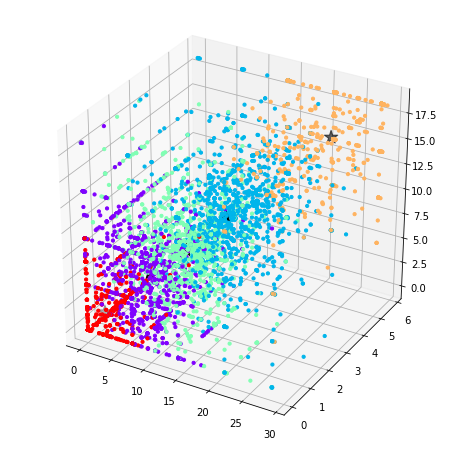

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_cluster

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()


In [ ]:
df_final['등급'] = df_cluster['등급']
df_final_cluster = df_final.copy()
df_final_cluster

,사업자등록번호,산업분류코드,기업명,우편번호,주소,전화번호,이메일주소,직군명,평가자수,스펙과 커리어 지수,...,업무생명균형점수_데이터,복지및급여점수_데이터,근무환경평균만족도_데이터,평균근속기간_데이터,고용전망점수_데이터,기업문화점수_데이터,경영진점수평균_데이터,인적자원복지점수_데이터,연차평균(종합)_데이터,등급
0,1050508965,96910.0,크린토**,3998.0,서울 마포구 동교로17길,존재하지않음,존재하지않음,존재하지않음,0.0,10.662832,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,C
1,1010204456,46510.0,씨앤피비즈***,3966.0,서울 마포구 월드컵북로 137,02-334-0349,djham29@hanmail.net,존재하지않음,0.0,12.375278,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,B
2,1048107174,50130.0,(주)씨트랜***,4031.0,서울 마포구 월드컵북로1길 26-16,02-322-4890,존재하지않음,존재하지않음,0.0,10.197760,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,C
3,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,경영/기획/컨설팅,3.0,18.805776,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,B
4,1018102731,73203.0,(주)파***,4172.0,서울 마포구 삼개로 27,02 733 8209,account@powerpt.co.kr,교육,1.0,21.153417,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,2148708573,58222.0,아이티***,존재하지않음,"서울특별시 중구 삼일대로2길 70 (주자동,아이티메이트빌딩)",02-326-2106,존재하지않음,교육,1.0,21.198581,...,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,A
12445,4208704866,41119.0,부강산***,존재하지않음,서울특별시 노원구 동일로183길 10 301호 (공릉동),02-2606-2236,존재하지않음,존재하지않음,0.0,14.110495,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,C
12446,4618107952,41222.0,아이렉***,존재하지않음,"서울 금천구 디지털로 173 1104호-14호실 (가산동,엘리시아)",02-3288-3345,존재하지않음,존재하지않음,0.0,10.662832,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,C
12447,2208107776,63100.0,파이진***,존재하지않음,"서울 강남구 테헤란로 328 10층 (역삼동,동우빌딩)",02-501-1078,존재하지않음,존재하지않음,0.0,10.882489,...,예측데이터반영,예측데이터반영,실제데이터반영,실제데이터반영,실제데이터반영,예측데이터반영,예측데이터반영,예측데이터반영,실제데이터반영,C


In [ ]:
df_final_cluster.to_csv('/content/drive/Shareddrives/2022 디지털산업혁신 빅데이터 플랫폼 아이디어 경진대회/JDY/result/df_final_cluster.csv', index = None)